<a href="https://colab.research.google.com/github/nagae/ICL_B_2021/blob/main/%E6%97%A5%E6%9C%AC%E5%85%A8%E5%9B%BD%E3%81%AE%E9%99%BD%E6%80%A7%E6%95%B0_%E7%97%87%E4%BE%8B%E6%95%B0%E3%81%AE%E7%B4%AF%E7%A9%8D_%E6%97%A5%E6%99%82%E4%BB%B6%E6%95%B0%E3%82%92%E3%83%97%E3%83%AD%E3%83%83%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime

In [ ]:
# ファイルを読み込み，列名を使いやすい形に修正
fname = 'https://raw.githubusercontent.com/kaz-ogiwara/covid19/master/data/prefectures.csv' # これは2021年1月以降使えない
fname = 'https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv'
jp_df = pd.read_csv(fname, dtype=str)
jp_df.columns = [ "年", "月", "日", "都道府県", "Pref", "陽性数", "検査数", "入院数", "重症数","退院数", "死亡数","実効再生産数"]
jp_df # jp_df の外観を表示


,年,月,日,都道府県,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
0,2020,2,8,東京都,Tokyo,3,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2,8,神奈川県,Kanagawa,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,9,東京都,Tokyo,3,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,9,神奈川県,Kanagawa,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2,10,東京都,Tokyo,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19872,2021,5,5,熊本県,Kumamoto,4324,66663.0,502.0,16,3742.0,80,0.87
19873,2021,5,5,大分県,Oita,2099,114417.0,504.0,1,1567.0,28,0.99
19874,2021,5,5,宮崎県,Miyazaki,2246,30480.0,173.0,0,2043.0,22,0.67
19875,2021,5,5,鹿児島県,Kagoshima,2358,81722.0,283.0,2,2028.0,28,2.62


In [ ]:
# 都道府県名以外の全てのセルを整数値に変換する
for c in jp_df.columns:
    if c in ["都道府県", "Pref"]: # 都道府県名のデータは文字型として扱う
        jp_df[c] = jp_df[c].astype(str)
    else:
        jp_df[c] = pd.to_numeric(jp_df[c], errors='coerce') # 都道府県名以外のデータは数値として扱う
        jp_df[c] = jp_df[c].fillna(0) # データが欠損している部分を0で埋める
        jp_df[c] = jp_df[c].astype(float) # 一旦は実数型に変換する 
        if c not in ["実効再生産数"]: # 実効再生産数以外のデータは整数型として扱う
            jp_df[c] = jp_df[c].astype(int)

# 年月日の列からdatetime型のインデックスを生成する
jp_df["年月日"] = pd.to_datetime(jp_df[["年", "月", "日"]].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
# 都道府県名と年月日からなるマルチインデックスを構築
jp_df = jp_df.set_index(["都道府県", "年月日"])
jp_df # jp_df の概観を表示

,,年,月,日,Pref,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
都道府県,年月日,,,,,,,,,,,
東京都,2020-02-08,2020,2,8,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-08,2020,2,8,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-09,2020,2,9,Tokyo,3,0,0,0,0,0,0.00
神奈川県,2020-02-09,2020,2,9,Kanagawa,1,0,0,0,0,0,0.00
東京都,2020-02-10,2020,2,10,Tokyo,3,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
熊本県,2021-05-05,2021,5,5,Kumamoto,4324,66663,502,16,3742,80,0.87
大分県,2021-05-05,2021,5,5,Oita,2099,114417,504,1,1567,28,0.99
宮崎県,2021-05-05,2021,5,5,Miyazaki,2246,30480,173,0,2043,22,0.67


In [ ]:
# 数値ではない型の要素の抽出
pic = jp_df[['死亡数']][jp_df['死亡数'].apply(lambda s:pd.to_numeric(s, errors='coerce')).isnull()]
pic
jp_df.groupby("年月日").sum()

,年,月,日,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
年月日,,,,,,,,,,
2020-02-08,4040,4,16,4,0,0,0,0,0,0.00
2020-02-09,4040,4,18,4,0,0,0,0,0,0.00
2020-02-10,4040,4,20,4,0,0,0,0,0,0.00
2020-02-11,4040,4,22,5,0,0,0,0,0,0.00
2020-02-12,4040,4,24,5,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
2021-05-01,94987,235,47,594889,11334495,54671,1051,524974,10306,51.76
2021-05-02,94987,235,94,600506,11373840,56067,1077,528632,10370,51.72
2021-05-03,94987,235,141,605063,11410455,56987,1080,532487,10418,51.70


In [ ]:
#
# x軸の目盛りの見栄えを修正する関数を定義する
#
def fancy_ax(ax):
    ax = plt.gca() # 現在表示されているグラフのx/y軸を取得
    ## x軸の主目盛りを修正
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    #list(map(lambda x: x.set_y(-.15), ax.xaxis.get_majorticklabels())) # 主目盛りラベルの位置を下へ少しずらす
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=45)
    #ax.set_xticklabels(, minor=False)
    ## x軸の副目盛りを修正
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator()) # 副目盛りを週ごとに設定
    #ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m-%d")) # 副目盛りの表示を 03-31のように月-日にする
    #plt.setp(ax.get_xticklabels(which='minor'), rotation=45) # 副目盛りラベルを45度回転させる
    ax.grid(which='minor', axis='x', linestyle='--') # 副目盛りのグリッドの線種を点線にする
    return ax

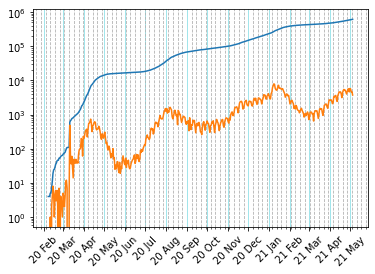

In [ ]:
# 日本全国のデータをプロットする
total_df = jp_df.groupby("年月日").sum()
plt.plot(total_df["陽性数"])
plt.plot(total_df["陽性数"].diff())
plt.yscale('log')
ax = fancy_ax(plt.gca())

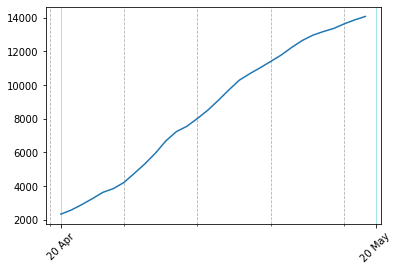

In [ ]:
# 期間を指定してプロットする
start = datetime.datetime(2020,4,1) # 開始日
end = datetime.datetime(2020,4,30) # 終了日
dates = pd.date_range(start, end)
plt.plot(dates, total_df["陽性数"][dates])
ax = fancy_ax(plt.gca())

In [ ]:
pref_df = jp_df.groupby("年月日").sum()
pref_df

,年,月,日,陽性数,検査数,入院数,重症数,退院数,死亡数,実効再生産数
年月日,,,,,,,,,,
2020-02-08,4040,4,16,4,0,0,0,0,0,0.00
2020-02-09,4040,4,18,4,0,0,0,0,0,0.00
2020-02-10,4040,4,20,4,0,0,0,0,0,0.00
2020-02-11,4040,4,22,5,0,0,0,0,0,0.00
2020-02-12,4040,4,24,5,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
2021-05-01,94987,235,47,594889,11334495,54671,1051,524974,10306,51.76
2021-05-02,94987,235,94,600506,11373840,56067,1077,528632,10370,51.72
2021-05-03,94987,235,141,605063,11410455,56987,1080,532487,10418,51.70


In [ ]:
#　最新の日付のデータだけを取り出すには，groupby("都道府県")としてグループ化したあと，last()を使って取り出す
jp_df.groupby("都道府県").last()
jp_df.index.get_level_values(0)

Index(['東京都', '神奈川県', '東京都', '神奈川県', '東京都', '神奈川県', '東京都', '神奈川県', '東京都',
       '神奈川県',
       ...
       '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'],
      dtype='object', name='都道府県', length=19877)

In [ ]:
pref_set = ["全国"] + jp_df[-47:].index.get_level_values(0).to_list()

(1, 12852.97823836313)

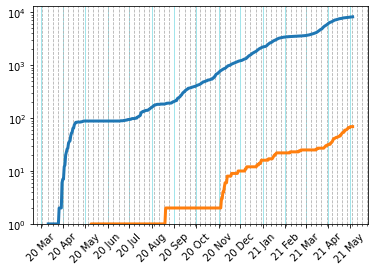

In [ ]:
pref = "宮城県"
if pref == "全国": # 県名に"全国"が指定された場合は，各日について全県の和をとったものをデータフレームとする
    pref_df = jp_df.groupby("年月日").sum()
else:
    pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築
conf = pref_df["陽性数"]
dead = pref_df["死亡数"]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(conf, label="total confirmed", zorder=10, linewidth=3)
ax1.plot(dead, label="total death", zorder=10, linewidth=3)
ax1 = fancy_ax(ax1) # ｘ軸の見栄えを整える
ax1.set_yscale('log') # y1軸を線形軸で表示
ax1.set_ylim(1,) # y1軸の表示下限を1にする

In [ ]:
pref_set = ["全国"] + jp_df[-47:].index.get_level_values(0).to_list() # 全部の県を対象とする
def plot_summary(pref_set):
    W = 7 # 移動平均を取る日数
    cols = 4 # 1行に表示するタイルの数（列数）
    rows = np.ceil(len(pref_set)/cols) # タイルの行数

    fig = plt.figure( figsize=(8*cols, 6*rows) ) # タイル数に応じた大きさの figure オブジェクトを用意

    for (pid, pref) in enumerate(pref_set): # enumerate を使うことで，県名 pref と同時に「何番目の図か」を表すインデックス pid を得ている
        # 県別データフレームを構成
        if pref == "全国": # 県名に"全国"が指定された場合は，各日について全県の和をとったものをデータフレームとする
            pref_df = jp_df.groupby("年月日").sum()
            e_pref = "Total"
        else:
            pref_df = jp_df.loc[pref] # 当該県データのみのデータフレームを構築
            e_pref = pref_df["Pref"][0]

        # 陽性数と死亡数を取得
        conf = pref_df["陽性数"] # 陽性と確定した者(confirmed)
        dead = pref_df["死亡数"] # 死亡者(dead)
    
        # add_subplot を使って複数の図をタイル状に配置
        ax1 = fig.add_subplot(rows, cols, pid+1)

        # 第1軸に累積陽性数/死亡数をプロットする
        ax1.plot(conf, label="total confirmed", zorder=10, linewidth=3)
        ax1.plot(dead, label="total death", zorder=10, linewidth=3)
        ax1 = fancy_ax(ax1) # ｘ軸の見栄えを整える
        ax1.set_yscale('log') # y1軸を線形軸で表示
        ax1.set_ylim(1,) # y1軸の表示下限を1にする

        # 第2軸に日次新規件数をプロットする
        #    ax2 = plt.twinx(ax1) # 第2軸を用意する
        ax1.fill_between(conf.index, conf.diff().rolling(W).mean(), label="new confirmed", alpha=0.25, zorder=1) # 陽性者
        ax1.fill_between(dead.index, dead.diff().rolling(W).mean(), label="new death", alpha=0.25, zorder=1) # 死亡者
        #    ax2.set_yscale('log') # y2軸を線形軸で表示
        #    ax2.set_ylim(0,) # y2軸の表示下限を0にする
        #    ax2.set_xticks([]) # x2軸は表示しない
    
        # 最初の図だけ y1/y2軸ラベルを付ける
        if pid == 0:
            ax1.legend(loc='upper left')
        #        ax1.set_ylabel("weekly growth rate") # y1軸ラベル
        #        ax2.set_ylabel("daily") # y2軸ラベル
        
        # y1軸をy2軸の上に表示させる
        #    ax1.set_zorder(ax2.get_zorder()+1)
        #    ax1.patch.set_visible(False)

        # グラフのタイトルと凡例を表示
        ax1.set_title(e_pref) # "Pref"列の第0要素（先頭要素）をタイトルとして表示
        #    h1, l1 = ax1.get_legend_handles_labels() # ax1軸の凡例を抽出するおまじない
    #    h2, l2 = ax2.get_legend_handles_labels() # ax2軸の凡例を抽出するおまじない
    #    ax1.legend(h1+h2, l1+l2, loc='upper left') # ax1軸とax2軸の凡例を一緒に出力するおまじない
    plt.tight_layout()
    plt.show()
    return fig

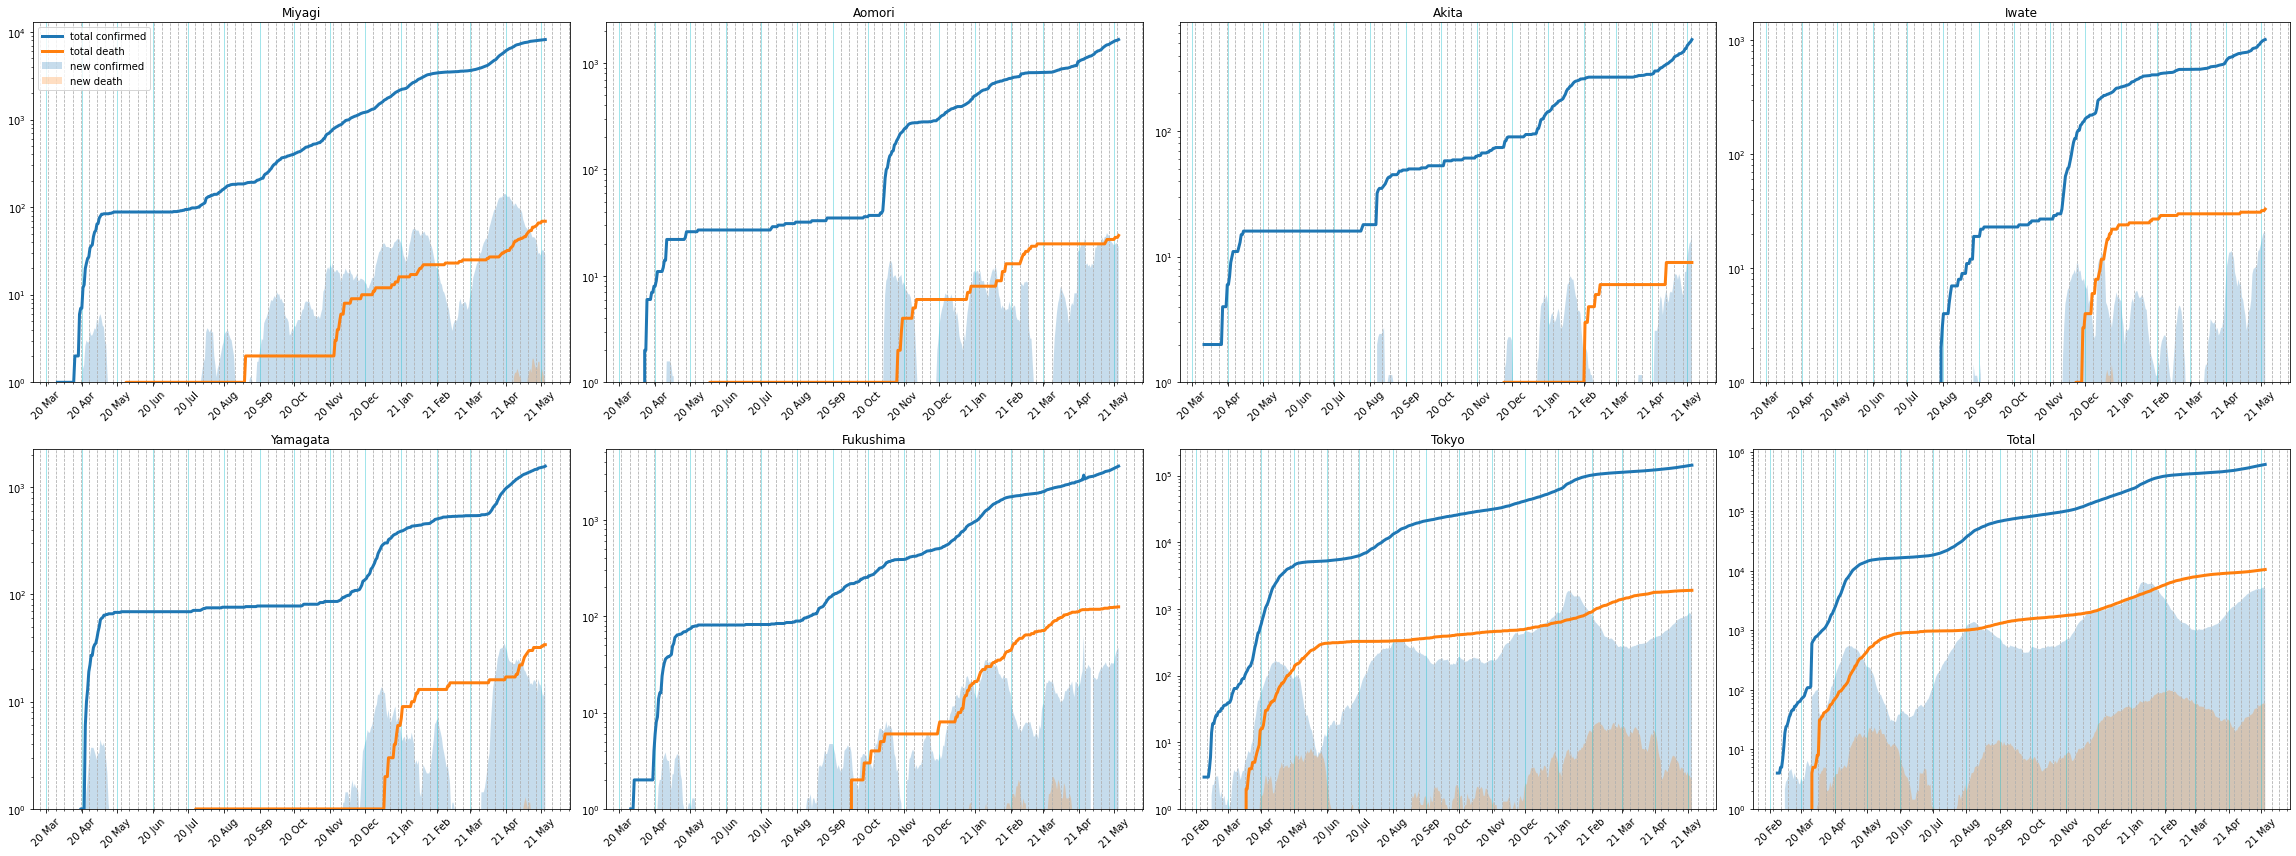

In [ ]:
pref_set = ["宮城県", "青森県", "秋田県", "岩手県", "山形県", "福島県", "東京都", "全国"] # 東北6県
fig = plot_summary(pref_set)
fig.savefig("%s-JP_Pref_Confirmed_Death_0.png" % datetime.datetime.today().strftime("%Y-%m-%d"), dpi=100,bbox_inches="tight")
fig.savefig("%s-JP_Pref_Confirmed_Death_0.pdf" % datetime.datetime.today().strftime("%Y-%m-%d"), dpi=100,bbox_inches="tight")

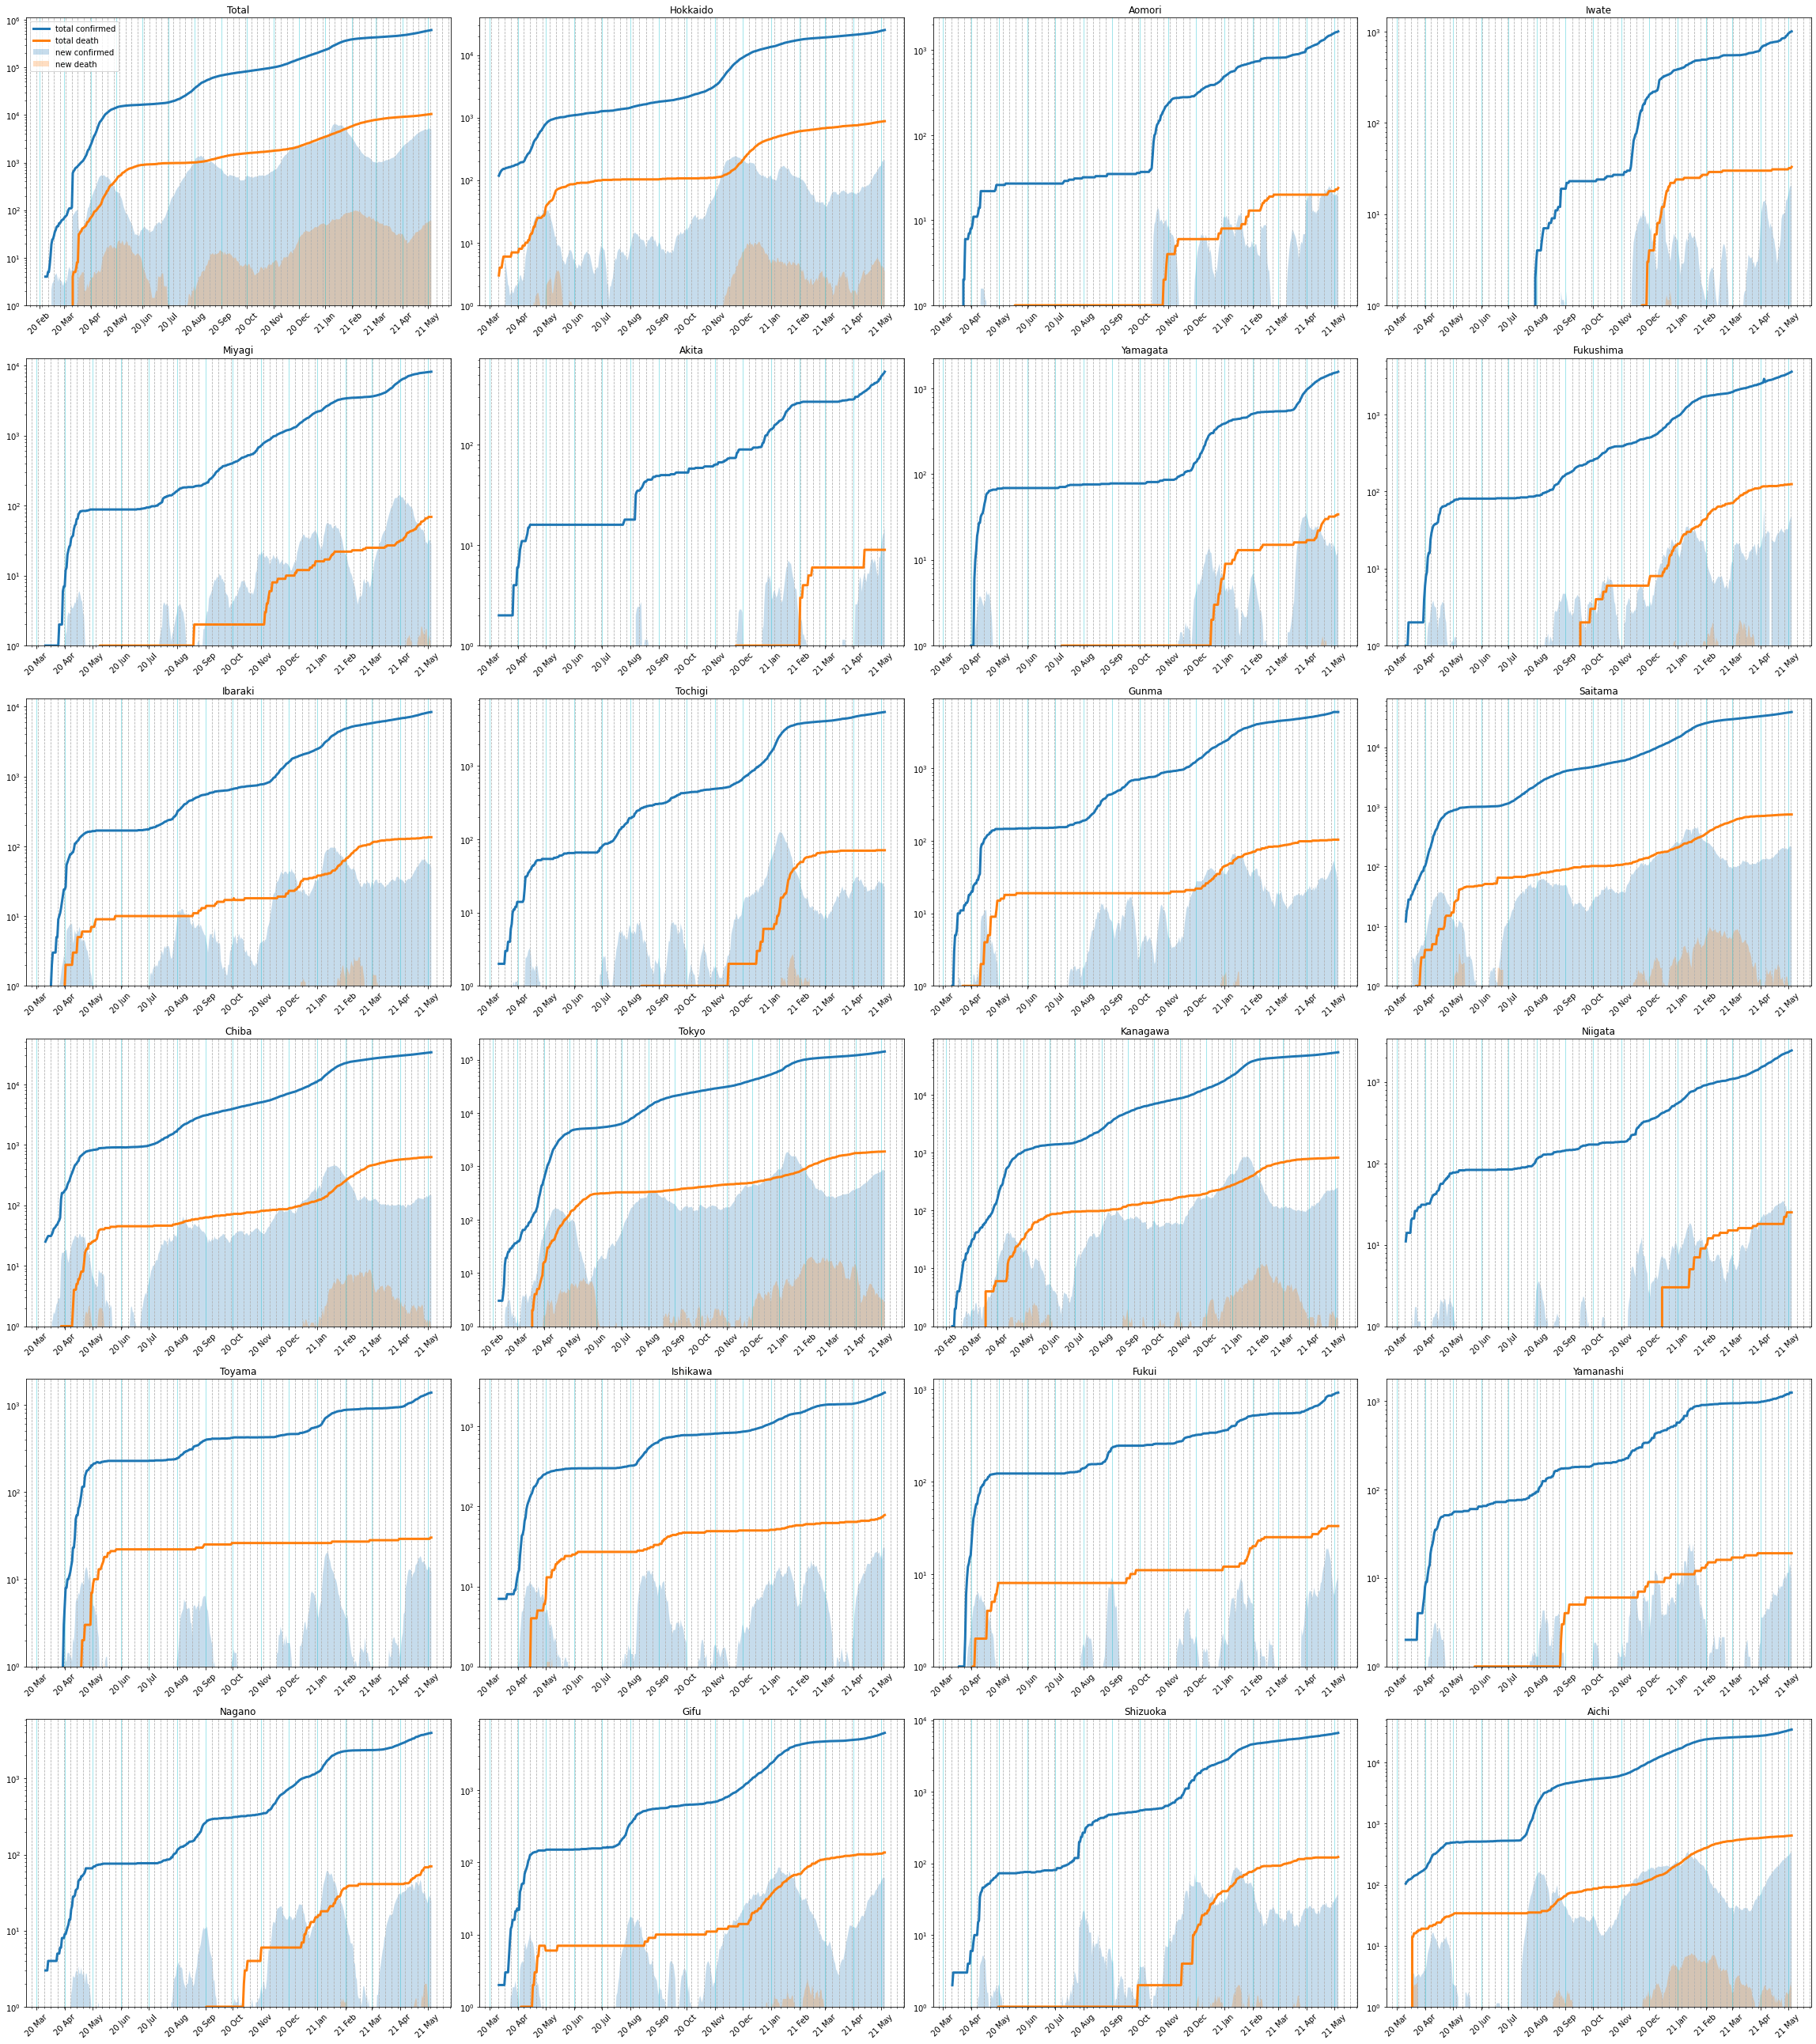

In [ ]:
pref_set1 = ["全国"] + jp_df[-47:-24].index.get_level_values(0).to_list() # 全部の県を対象とする
pref_set2 = jp_df[-24:].index.get_level_values(0).to_list() # 全部の県を対象とする
fig = plot_summary(pref_set1)
fig.savefig("%s-JP_Pref_Confirmed_Death_1.png" % datetime.datetime.today().strftime("%Y-%m-%d"), dpi=100,bbox_inches="tight")
fig.savefig("%s-JP_Pref_Confirmed_Death_1.pdf" % datetime.datetime.today().strftime("%Y-%m-%d"), bbox_inches="tight")

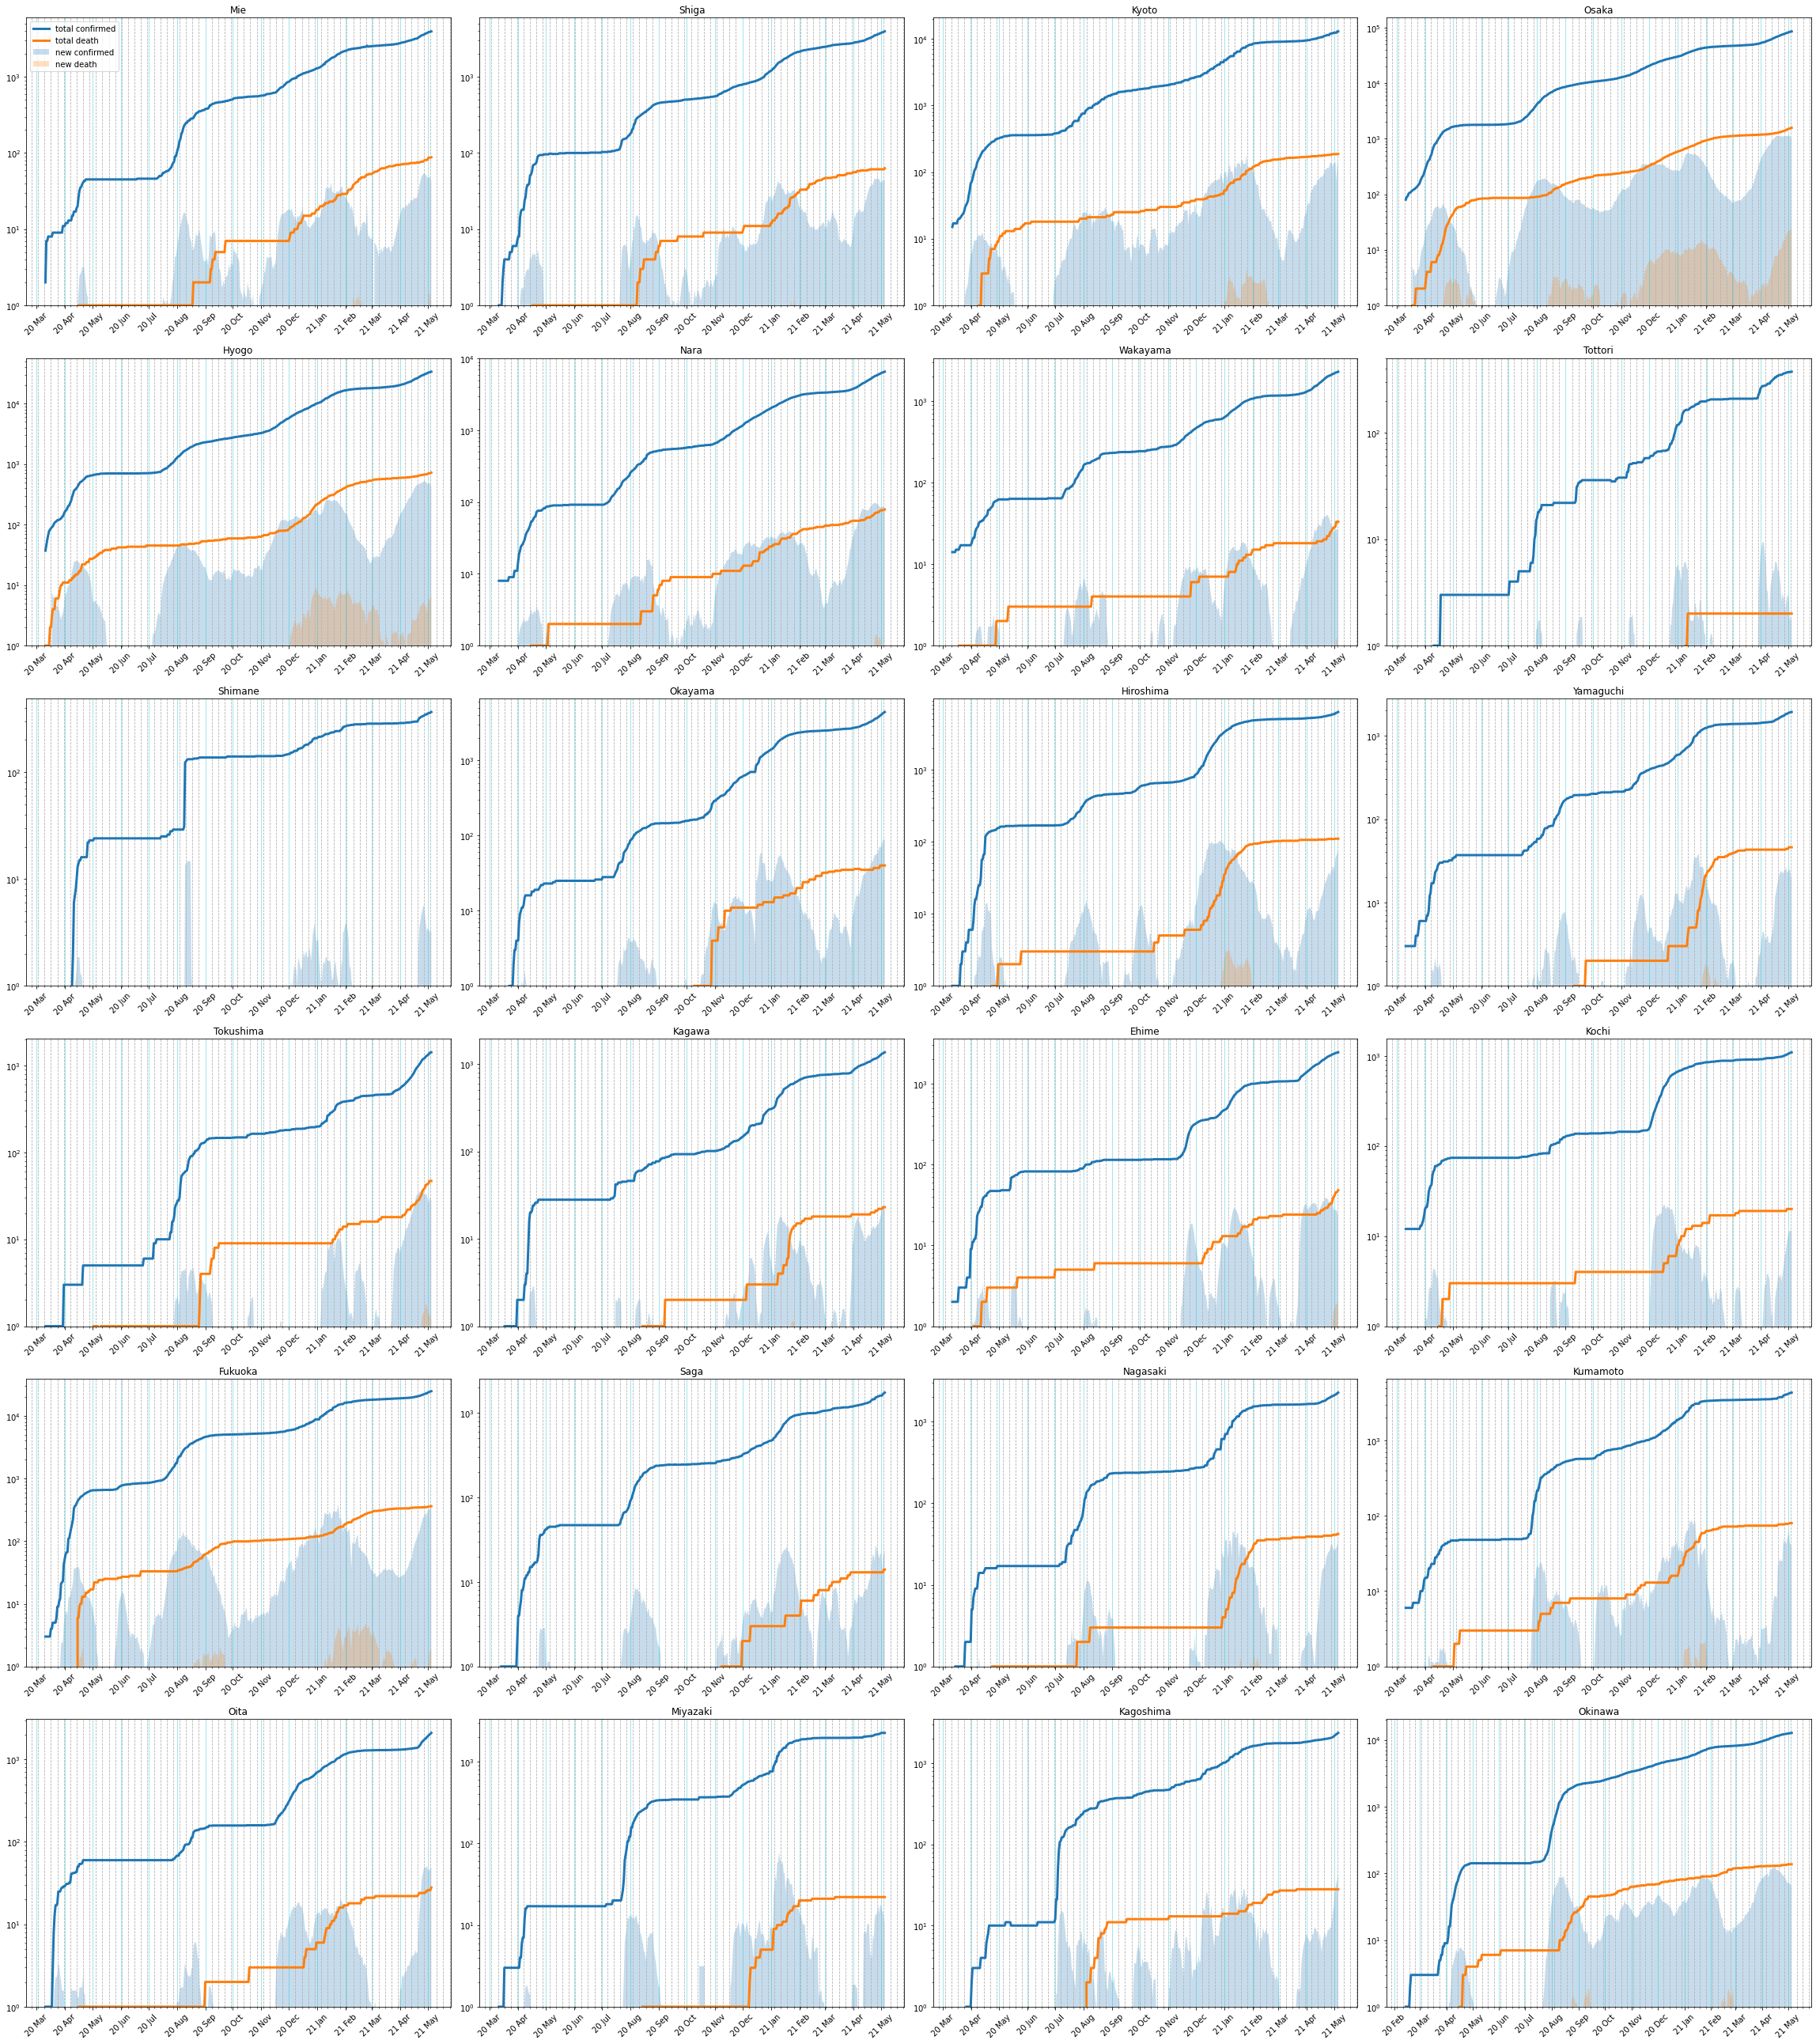

In [ ]:
fig = plot_summary(pref_set2)
fig.savefig("%s-JP_Pref_Confirmed_Death_2.png" % datetime.datetime.today().strftime("%Y-%m-%d"), dpi=100,bbox_inches="tight")
fig.savefig("%s-JP_Pref_Confirmed_Death_2.pdf" % datetime.datetime.today().strftime("%Y-%m-%d"), bbox_inches="tight")